In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [20]:
def mean_reversion(df1, MA_length, exit_signal):
    
    df=df1.copy()

    # df is a dataframe with a date column, and two futures price data columns
    # MA_length is the length of the moving average we will use
    # exit_signal is the z score at which we will exit our position (+/- 2 stdevs is the entry)
    
    #read in daily risk-free rates data (obatined from WRDS)
    Rf = pd.read_csv("Rf.csv",header=0,names=['Date','Rf'])
    Rf.Date = pd.to_datetime(Rf.Date)
    
    #get relevant dates for risk free rate
    Rf = Rf[(Rf.Date >= df.Date[0]) & (Rf.Date <= df.Date[len(df.Date)-1])]
    Rf = Rf.reset_index(drop=True)
    
    #create the column for the spread
    df['Spread'] = df.iloc[:,1] - df.iloc[:,2]
    
    #create columns for moving average, rolling standard deviation, and z-score for the current price level of the spread
    df['MA'+str(MA_length)] = df.Spread.rolling(MA_length).mean()
    df['SD'+str(MA_length)] = df.Spread.rolling(MA_length).std()
    df['Z'+str(MA_length)] = (df.Spread-df['MA'+str(MA_length)])/df['SD'+str(MA_length)]
    
    
    ## creating signal column which determines when we are long/short the spread
    #determine initial entry points, which is when z-score is above 2 or below -2
    df["Signal"] = [1 if x < -2 else (-1 if x > 2 else 0) for x in df['Z'+str(MA_length)]]
    
    # fill in signal columns until the point where we receive an exit signal (determined by "exit_signal" variable)
    for i in range(1,len(df.index)):
        if df.iloc[i-1,7] == -1:
            if df.iloc[i,6] > -1*exit_signal:
                df.iloc[i,7] = -1
        elif df.iloc[i-1,7] == 1:
            if df.iloc[i,6] < exit_signal:
                df.iloc[i,7] = 1
            
    #calculate returns; we will use the average price level of the two contracts as our investment/"employed capital"
    df['Ret'] = df.Spread.diff().shift(-1)/(df.iloc[:,1]+df.iloc[:,2])/2
    df.Ret = df.Ret*df.Signal
    
    #get summary statistics for returns
    returns = df.Ret[df.Signal !=0]
    returns = returns.dropna()
    stats = returns.describe()
    
    #get average daily risk free rate over the period
    stats2 = Rf.Rf.describe()

    sharpe = (stats[1]-stats2[1])/stats[2]*np.sqrt(252)
    
    return sharpe


In [21]:
#variables to try
MA_length = [10,15,20,50,100]
exit_signal = [-0.5,-0.2,0,0.2,0.5]

#read in crude oil futures data and daily risk-free rates data (obtained from WRDS)
crude = pd.read_csv("Crude_Oil.txt",sep="\t")
crude.Date = pd.to_datetime(crude.Date,dayfirst=True)


In [22]:
# WTI Front - Brent Front Spread
df1=pd.DataFrame()

for i in MA_length:
    l = []
    for j in exit_signal:
        l.append(mean_reversion(crude[["Date","RCLC1","LLCC1"]],i,j))
    df1[str(i)] = l

df1.index = exit_signal


In [23]:
# WTI 2nd month - Brent 2nd month
df2=pd.DataFrame()

for i in MA_length:
    l = []
    for j in exit_signal:
        l.append(mean_reversion(crude[["Date","RCLC2","LLCC2"]],i,j))
    df2[str(i)] = l

df2.index = exit_signal


In [24]:
# WTI 3rd month - Brent 3rd month
df3=pd.DataFrame()

for i in MA_length:
    l = []
    for j in exit_signal:
        l.append(mean_reversion(crude[["Date","RCLC3","LLCC3"]],i,j))
    df3[str(i)] = l

df3.index = exit_signal


In [25]:
# WTI 4th month - Brent 4th month
df4=pd.DataFrame()

for i in MA_length:
    l = []
    for j in exit_signal:
        l.append(mean_reversion(crude[["Date","RCLC4","LLCC4"]],i,j))
    df4[str(i)] = l

df4.index = exit_signal



In [26]:
# WTI 5th month - Brent 5th month
df5=pd.DataFrame()

for i in MA_length:
    l = []
    for j in exit_signal:
        l.append(mean_reversion(crude[["Date","RCLC5","LLCC5"]],i,j))
    df5[str(i)] = l

df5.index = exit_signal


In [27]:
# WTI 6th month - Brent 6th month
df6=pd.DataFrame()

for i in MA_length:
    l = []
    for j in exit_signal:
        l.append(mean_reversion(crude[["Date","RCLC6","LLCC6"]],i,j))
    df6[str(i)] = l

df6.index = exit_signal


In [28]:
# WTI 1 year - Brent 1 year
df12=pd.DataFrame()

for i in MA_length:
    l = []
    for j in exit_signal:
        l.append(mean_reversion(crude[["Date","RCLC12","LLCC12"]],i,j))
    df12[str(i)] = l

df12.index = exit_signal


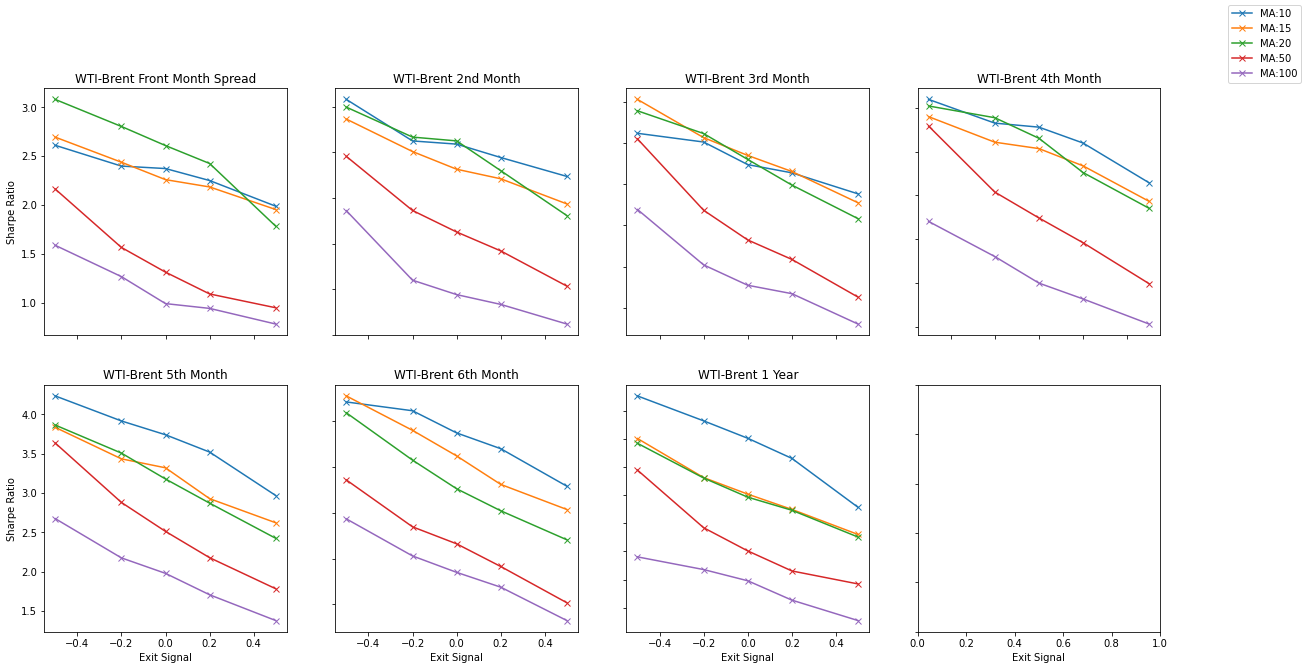

In [45]:
dfs = [df1,df2,df3,df4,df5,df6,df12]
titles = ["WTI-Brent Front Month Spread",
         "WTI-Brent 2nd Month",
         "WTI-Brent 3rd Month",
         "WTI-Brent 4th Month",
         "WTI-Brent 5th Month",
         "WTI-Brent 6th Month",
         "WTI-Brent 1 Year"]

fig, axs = plt.subplots(2, 4,figsize=(20,10))

c=0
for i in [0,1]:
    for j in [0,1,2,3]:
        if c==0:
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,0], 'x-', label="MA:10")
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,1], 'x-', label="MA:15")
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,2], 'x-', label="MA:20")
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,3], 'x-', label="MA:50")
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,4], 'x-', label="MA:100")
            axs[i, j].set_title(titles[c])
        elif c<7:
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,0], 'x-')
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,1], 'x-')
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,2], 'x-')
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,3], 'x-')
            axs[i, j].plot(dfs[c].index, dfs[c].iloc[:,4], 'x-')
            axs[i, j].set_title(titles[c])
            
        c+=1


fig.legend()

for ax in axs.flat:
    ax.set(xlabel='Exit Signal', ylabel='Sharpe Ratio')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()